## Author: Nishad Joshi
### Task #1 - Prediction using Supervised ML 
#### Problem Statement - Predict the percentage of an student based on the number of study hours.

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading data
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
dataset = pd.read_csv(url, error_bad_lines=False)

In [3]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Visualizing the data

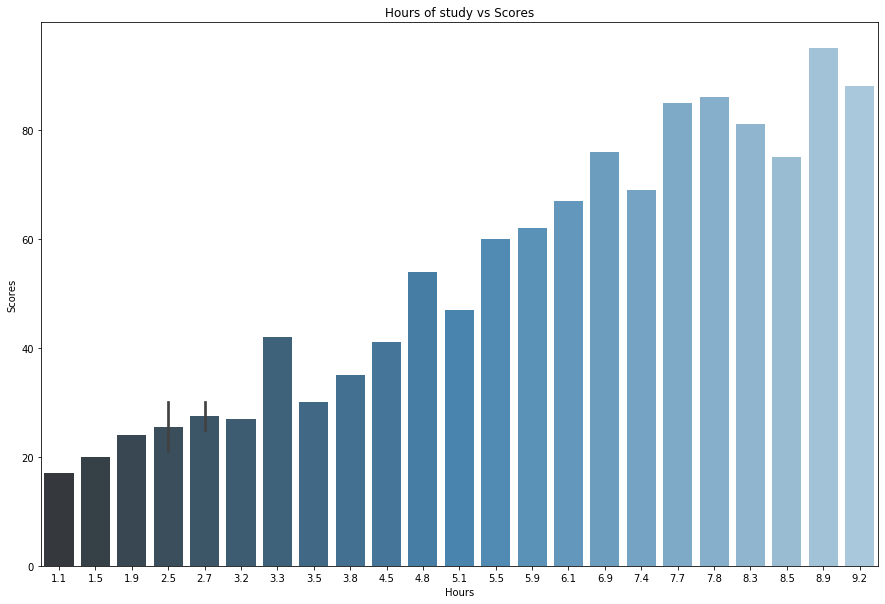

In [6]:
plt.figure(figsize=(15,10))
#sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Hours", y="Scores", data=dataset, palette = "Blues_d")
plt.title("Hours of study vs Scores")
plt.show()

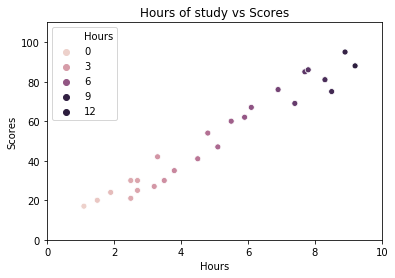

In [7]:
sns.scatterplot(data=dataset, x="Hours", y="Scores", hue="Hours", )
plt.xlim(0,10)
plt.ylim(0,110)
plt.title("Hours of study vs Scores")
plt.show()

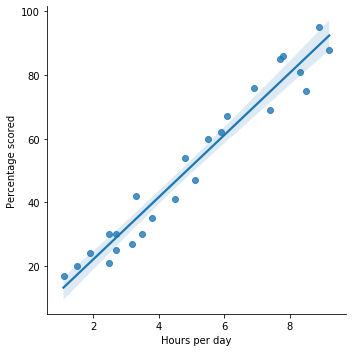

In [8]:
sns.lmplot(x = 'Hours', y = 'Scores', data = dataset)
plt.xlabel("Hours per day")
plt.ylabel("Percentage scored")
plt.show()

### Data Preprocessing

In [9]:
x = dataset['Hours']
y = dataset['Scores']

In [10]:
x = np.array(x)
x = x.reshape((-1, 1))

y = np.array(y)
y = y.reshape((-1, 1))

In [11]:
from sklearn import linear_model
regression = linear_model.LinearRegression()

### Splitting the data 

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

### Training Data

In [13]:
regression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Predicting on test data

In [14]:
y_pred = regression.predict(X_test)

In [15]:
y_pred

array([[12.18101895],
       [27.87844502],
       [61.23547543],
       [88.70597106],
       [20.02973199]])

In [16]:
y_test

array([[17],
       [30],
       [67],
       [95],
       [24]], dtype=int64)

In [17]:
actual = []
predicted = []
for i in y_test: actual.append(i[0])
for i in y_pred: predicted.append(i[0])

In [18]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': actual, 'Predicted': predicted})  
df 

,Actual,Predicted
0,17,12.181019
1,30,27.878445
2,67,61.235475
3,95,88.705971
4,24,20.029732


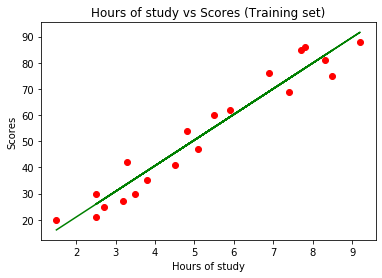

In [19]:
plt.scatter(X_train, y_train, color = "red")
plt.plot(X_train, regression.predict(X_train), color = "green")
plt.title("Hours of study vs Scores (Training set)")
plt.ylabel("Scores")
plt.xlabel("Hours of study")
plt.show()

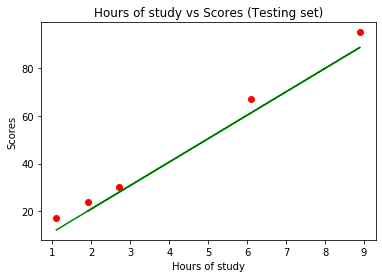

In [20]:
plt.scatter(X_test, y_test, color = "red")
plt.plot(X_test, regression.predict(X_test), color = "green")
plt.title("Hours of study vs Scores (Testing set)")
plt.xlabel("Hours of study")
plt.ylabel("Scores")
plt.show()

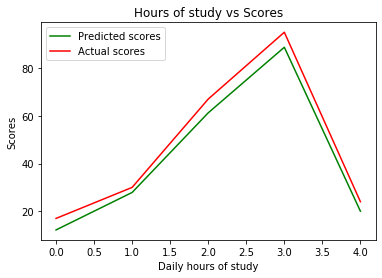

In [21]:
plt.plot(y_pred ,color="green")            #module: plot: line chart
plt.plot(y_test,color="red")
plt.title("Hours of study vs Scores")
plt.legend(['Predicted scores','Actual scores'])
plt.xlabel('Daily hours of study')
plt.ylabel('Scores')

plt.show()

In [22]:
from sklearn import metrics 
print("Mean Squared Error :", metrics.mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

Mean Squared Error : 23.266229182609738
Mean Absolute Error: 4.593871512300604


### Intercept and Co-efficient of the model

In [23]:
print("Intercept :",regression.intercept_)
print("Coefficient :",regression.coef_)

Intercept : [1.38903852]
Coefficient : [[9.8108913]]


### Predicting the score

#### What will be predicted score if a student studies for 9.25 hrs/ day? 

In [24]:
score = regression.predict([[9.25]])
print('Predicted Score is :', score[0][0])

Predicted Score is : 92.13978300866827


According to the model student is likely to get 92% if he/she studies for 9.25 hrs/day